# Linear Regression

Linear Regression is a statistical method used to model the relationship between continuous variables. These variables include independent variables (often denoted as x_i) and a dependent variable (often denoted as Y). This method aims to model and analyze how changes in the independent variables affect the dependent variable. The core idea behind linear regression is to fit a "line" to a set of data points in such a way that the distance between the "line" and the data points is minimized. 

As an example, I graphed some random data (blue points), the line predicting the blue points (in black), and the error of how far off our prediction is from each blue point (in red).

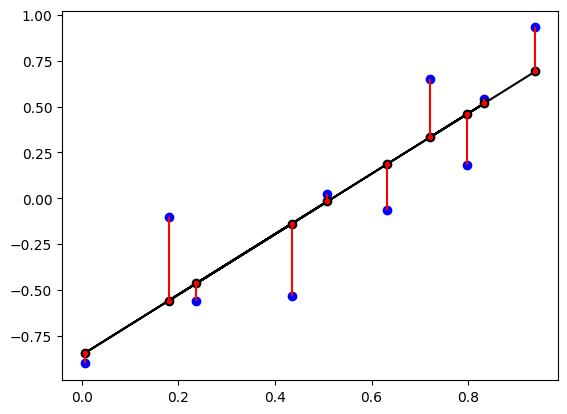

In [128]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

X_random = np.random.rand(10,1)
y_random = X_random + np.random.rand(10,1)*(-1)**np.random.randint(0,2)

reg_lin = LinearRegression()
reg_lin.fit(X_random, y_random)

y_predictions = reg_lin.predict(X_random)
y_error_array = y_predictions - y_random

y_error_lower = []
y_error_upper = []
y_error_list = [y_err[0] for y_err in y_error_array]

for index in range(0, len(y_error_array)):
    temp_y_error = y_error_list[index]  
    if y_error_list[index] > 0:
        y_error_upper.append(temp_y_error)
        y_error_lower.append(0)
    else:
        y_error_lower.append(abs(temp_y_error))
        y_error_upper.append(0)

plt.plot(X_random, y_random, 'bo')
plt.plot(X_random, y_predictions, 'ko-')
plt.errorbar(X_random.reshape(10,), y_predictions.reshape(10,), yerr=[y_error_upper, y_error_lower], fmt='.r')
plt.show()

When there is only one independent variable, it is known as a Simple Linear Regression.

Since the wine dataset has categories and we want continuous variables, we'll use the diabetes dataset from scikit-learn. 

In [ ]:
# import necessary functions from sklearn
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# Load the diabetes dataset
diabetes = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.2)

# Create a linear regression
reg_lin = LinearRegression()
reg_lin.fit(X_train, y_train)

LinearRegression()

In [60]:
import numpy as np

# Make predictions
predictions = reg_lin.predict(X_test)

# Evaluate coefficient of determination
r2 = r2_score(y_test, predictions)
print("Linear Regression R2:", f'{int(round(r2, 2)*100)}%')
print("Linear Regression R:", f'{round(np.sqrt(r2), 2)}')

Linear Regression R2: 56%
Linear Regression R: 0.75


With regression models, we no longer use accuracy to evaluate models. Instead, we use R2, also known as the coefficient of determination. R2 (or R^2) describes the proportion of variation in dependent variable that is predictable from the independent variables. We can think of it as correlation (R) squared, so it'll range from 0 to 1 and we want it to be as close to 1 as possible. 

The context of your model will determine whether the R2 is "good enough" or not. 

Like we saw with SVM, it can be difficult to visualize linear regressions with many indepdenent variables (features). Let's create a Simple Linear Regression with the first diabetes feature. 

Linear Regression R2: 5%
Linear Regression R: 0.22


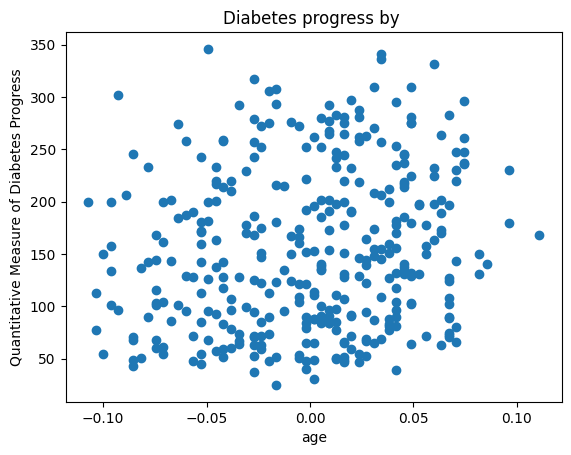

In [61]:
import matplotlib.pyplot as plt

first_feature_diabetes = np.array([diabetes.data[index][0] for index in range(len(diabetes.data))]).reshape(-1, 1)
X_train_1f, X_test_1f, y_train_1f, y_test_1f = train_test_split(first_feature_diabetes, diabetes.target, test_size=0.2)

# Create a decision tree classifier
reg_lin_1f = LinearRegression()
reg_lin_1f.fit(X_train_1f, y_train_1f)

# Make predictions
predictions_1f = reg_lin_1f.predict(X_test_1f)

# Evaluate coefficient of determination
r2_1f = r2_score(y_test_1f, predictions_1f)
print("Linear Regression R2:", f'{int(round(r2_1f, 2)*100)}%')
print("Linear Regression R:", f'{round(np.sqrt(r2_1f), 2)}')

# Visualize the relationship between study hours and exam scores
plt.scatter(X_train_1f, y_train_1f)
plt.title(f'Diabetes progress by ')
plt.xlabel(f'{diabetes.feature_names[0]}')
plt.ylabel('Quantitative Measure of Diabetes Progress')
plt.show()

As you can see, just `age` is not a good predictor of diabetes progress. We need more features to accurately predict the disease's progress.

You may be wondering "How is age a decimal??" If we look at diabetes.DESCR, we get our answer: 

> Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times the square root of `n_samples` (i.e. the sum of squares of each column totals 1). 

This process is referred to as *standardizing* and is important when it comes to comparing features in a regression. We leave how to appropriately standardize data for a future lesson.